# Ivarsson et al. (2009): Femur shaft Bending and axial compression

- Performed by: Yash Niranjan Poojary
- Reviewed by: 
- Last modified : 31st January 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.1.0 `

## Experiment by  Ivarsson (2009)

### Summary:

The simulated outputs are compared to the references from PMHS tests reported by  Ivarsson  <sup>[1]</sup>
1. IVARSSON, B. Johan, et al. The tolerance of the femoral shaft in combined axial compression and bending loading. Stapp car crash journal, 2009, 53: 251.

<!-- ![](../_env/setup_ivarsson_femur.PNG)  -->
```{figure} ../_env/setup_ivarsson_femur.PNG
---
align: center
---
Setups in testing
```

## Experiment
### Information on the subjects/specimens
| Test ID | Subject ID | Age (yrs) | Sex |    Loading mode   |
|:-------:|:----------:|:---------:|:---:|:-----------------:|
|   1.01  |     373    |     51    |  M  | Combined Loading  |
|   1.02  |     373    |     51    |  M  | Combined Loading  |
|   1.03  |     374    |     62    |  M  | Combined Loading  |
|   1.04  |     374    |     62    |  M  | Combined Loading  |
|   1.05  |     375    |     62    |  M  | Combined Loading  |
|   1.06  |     375    |     62    |  M  | Combined Loading  |
|   1.07  |     376    |     49    |  M  | Combined Loading  |
|   1.08  |     376    |     49    |  M  | Combined Loading  |
|   1.09  |     377    |     62    |  M  | Combined Loading  |
|   1.1   |     378    |     44    |  M  | Combined Loading  |
|   1.11  |     378    |     44    |  M  | Combined Loading  |
|   1.12  |     379    |     58    |  M  | Combined Loading  |
|   1.13  |     379    |     58    |  M  | Combined Loading  |
|   1.14  |     380    |     65    |  M  | Combined Loading  |
|   1.15  |     380    |     65    |  M  | Combined Loading  |
|   1.16  |     381    |     53    |  M  | Combined Loading  |
|   1.17  |     381    |     53    |  M  | Combined Loading  |
|   1.30  |     385    |     62    |  M  | Combined Loading  |
|   1.34  |     390    |     63    |  M  | Bending           |
|   1.37  |     392    |     45    |  M  | Bending           |
|   1.38  |     392    |     45    |  M  | Bending           |
|   2.06  |     327    |     39    |  M  | Bending           |
|  2.07b  |     362    |     51    |  M  | Bending           |



### Loading and Boundary Conditions
- 23 male specimens tested for axial compression, bending and combined loading.
- The potting cups are made of PMMA were defined with youngs modulus 3.1 GPa, poissons ratio 0.3 and density $1180 kg/m^3$
- The linear bearings were defined as rigid parts youngs modulus 70 GPa, poissons ratio 0.34 and density $2700 kg/m^3$
- A foam material for bending and combined load cases was defined using MAT57 (`*MAT_LOW_DENSITY_FOAM`) material with a nominal stress versus strain curve extracted from the litrture and density 15.6 $kg/m^3$. Two layers of 1 mm belytschko-tsay shell elements were generated as `MAT_NULL_SHELLS` to prevent penetrations.
- The ends of the femur shaft was aligned with the line connecting the centre of rotation of the potting cups. 
- Each potting cup-holder, with linear bearings, were modelled as a revolute joint.
- The right cup, cup-holder and linear bearing was allowed to translate in X-direction, other degrees of freedom were
- restricted. Each of the 23 tests were modelled with associated prescribed displacement from the litrature
### Responses recorded
- force-time  measured at the contact.
- displacement time of the impactor.

The reference values from the paper were digitalised and are incuded in the notebook

### Other references
2.	Drevon D, Fursa SR, Malcolm AL. Intercoder reliability and validity of WebPlotDigitizer in extracting graphed data. Behavior modification. 2017;41(2):323-39. 
3.	Svensson, Gustav. ["Finite Element Modelling of Knee Joint and Femur for Future Injury Assessment"](https://odr.chalmers.se/handle/20.500.12380/305815) (2022).
4.	Schubert, A., Erlinger, N., Leo, C., Iraeus, J., John, J., & Klug, C. (2021, September). ["Development of a 50th percentile female femur model"](https://www.ircobi.org/wordpress/downloads/irc21/pdf-files/2138.pdf). In IRCOBI conference proceedings (Online).

In [13]:
import os
import glob
# for data analysis
import pandas as pd
import numpy as np

In [14]:
 # Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
experiment = {"linestyle" :'--', "color" : 'k',"alpha" : 0.7}
simulation = {"linestyle" :'-', "color" : 'b',"alpha" : 0.7,"linewidth":2}
# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [15]:
Tests=['1_01' , '1_02', '1_03', '1_04', '1_05',
       '1_06', '1_07', '1_08' , '1_09', '1_10',
       '1_11', '1_12', '1_13', '1_14', '1_15',
       '1_16', '1_17' , '1_30', '1_34', '1_37',
       '1_38', '2_06', '2_07b']


figures_dir = "../data/processed/SAFER_11.0/figures/"
processed_data_dir = f"../data/processed/SAFER_11.0"
experiment_dir= "../data/experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])

## Postprocessing with dynasaur

In [5]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [6]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/id-V11.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/post.def", "../_env/strain_calc.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]
# dynasaur_calculation_defs = [ "../_env/post.def", "../_env/strain_calc.def", "../_env/stress_calc.def"]

In [7]:
sim_output={}
exp={}
for test in Tests:
    sim_M = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim_M.get_defined_calculation_procedures()
    print(commands)
    for command in sim_M.get_defined_calculation_procedures():
        sim_M.calculate(command)
    # export post-processed data
    sim_M.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    # Import processed data
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])
    

[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/id-V11.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read elout data ...
[READ BINOUT]	elout: initialize stress solid
[READ BINOUT]	assign stresses for solid elements
[READ BINOUT]	extract data took : 0.4462144374847412
[READ BINOUT]	calc eigenvalue
[READ BINOUT]	calc eigenvalues took : 1.4042768478393555
[READ BINOUT]	assign strains for solid elements
[READ BINOUT]	elout: initialize strain solid
[READ BINOUT]	extract data took : 0.3177778720855713
[READ BINOUT]	calc eigenvalue
[READ BINOUT]	calc eigenvalues took : 0.19607090950012207
[READ BINOUT]	done reading elout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'impactor_Force', 'x_label': 't

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_01
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_01\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_02
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_02\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_03
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_03\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_04
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_04\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_05
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_05\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_06
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_06\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_07
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_07\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_08
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_08\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_09
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_09\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_10
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_10\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_11
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_11\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_12
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_12\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_13
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_13\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_14
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_14\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_15
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_15\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_16
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_16\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_17
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_17\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_30
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_30\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_34
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_34\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_37
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_37\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\1_38
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\1_38\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\2_06
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\2_06\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../_env/strain_calc.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: BONES_strain
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\2_07b
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\2_07b\Dynasaur_output.csv


In [8]:
# Import experimental data
exp=pd.read_csv(os.path.join(experiment_dir,'Ivarsson_et_al_2009_impactor_force.csv'.format(test)),delimiter=';',header=[0])
exp_axl=pd.read_csv(os.path.join(experiment_dir,'Ivarsson_et_al_2009_axial_force.csv'.format(test)),delimiter=';',header=[0])

### Combined loading

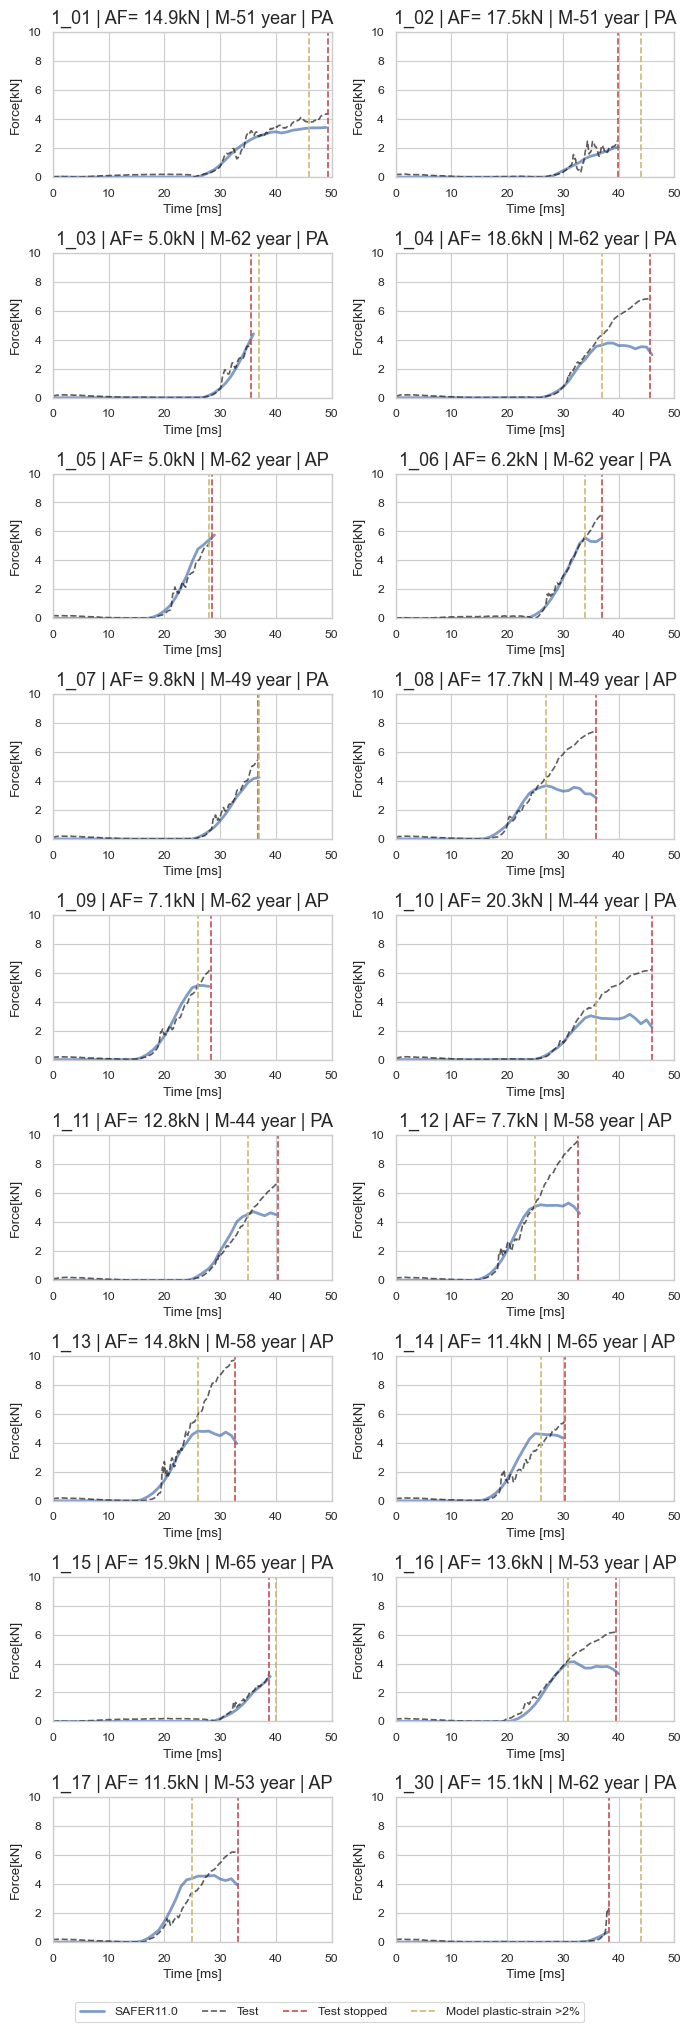

In [9]:
fig_ft, axs = plt.subplots(nrows=9, ncols=2,figsize=(7, 20))
Age=['51' , '51', '62', '62', '62','62', '49', '49', '62', '44','44', '58' , '58', '65', '65','53', '53', '62', '63', '45','45', '39', '51']
sp_pos=['PA' , 'PA', 'PA', 'PA', 'AP','PA', 'PA', 'AP', 'AP', 'PA','PA', 'AP' , 'AP', 'AP', 'PA','AP', 'AP', 'PA', 'AP', 'AP','PA', 'AP', 'PA']
start_time=[26,28,27,28,18,24,25,17,15,26,25,16,17,17,30,20,16,34,17,17,24,17,22]
i=0
for ax in axs.flat:
    ax.set_ylabel('Force[kN]')
    ax.set_xlabel('Time [ms]');
    if i > 17:
        break;
    ax.set_title('{} | AF= {:.1f}kN | M-{} year | {}'.format(Tests[i],max((exp_axl[Tests[i]])),Age[i],sp_pos[i]),fontsize=13)
    fail_2p=sim_output[Tests[i]].BONES.strain.time.iloc[sim_output[Tests[i]].BONES.strain.strain[sim_output[Tests[i]].BONES.strain.strain<0.0277].last_valid_index()][0]
    t=exp.Time[exp[Tests[i]]==max(exp[Tests[i]])].item()
    ax.set_xlim([0,50])
    ax.set_ylim([0,10])
    ax.plot(sim_output[Tests[i]].impactor.Force.time.iloc[:round(t)+1],sim_output[Tests[i]].impactor.Force.force.iloc[:round(t)+1],**simulation)
    ax.plot(exp.Time,exp[Tests[i]],label='Test',**experiment)
    ax.axvline (x=t,linestyle='--',color='r')
    ax.axvline (x=fail_2p,linestyle='--',color='y')
    i=i+1
fig_ft.legend(["SAFER11.0","Test","Test stopped","Model plastic-strain >2%"], bbox_to_anchor=(0.85,0),ncols=4);
fig_ft.tight_layout()

### Energy plots

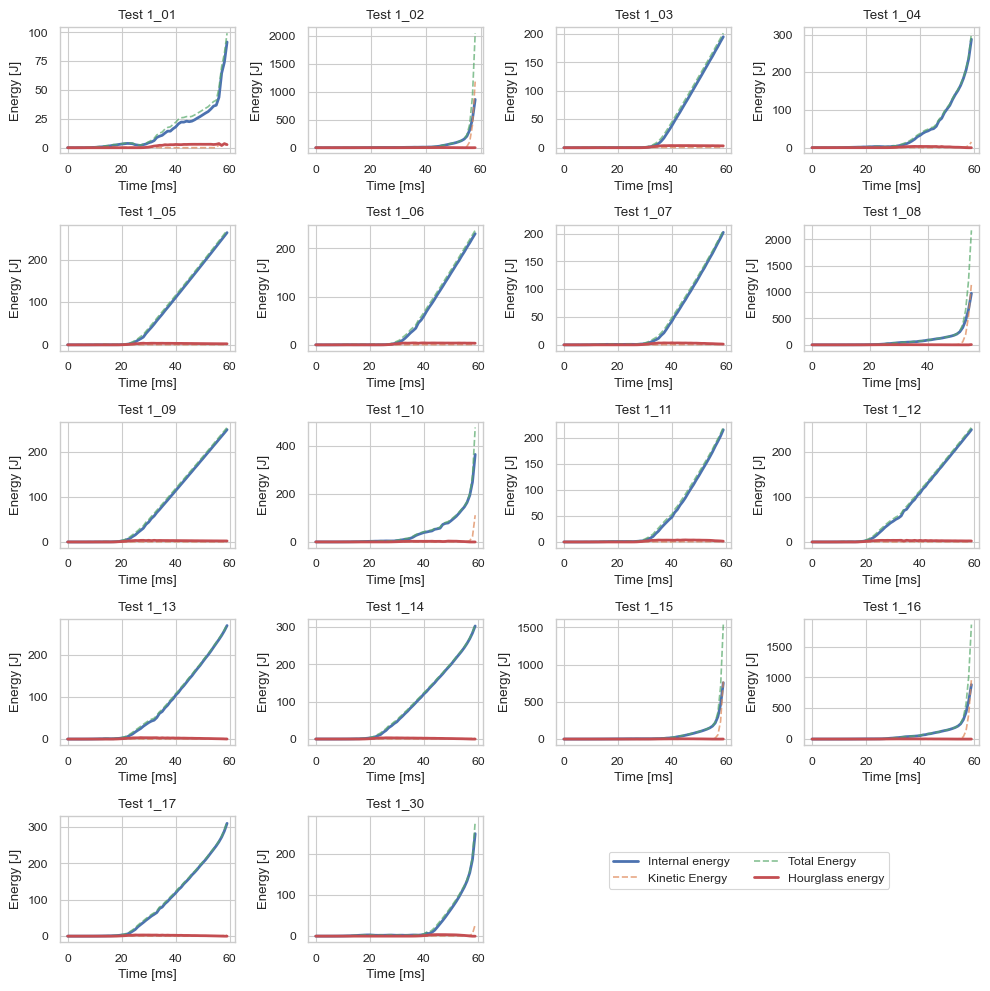

In [27]:
fig_eny, axs = plt.subplots(nrows=5, ncols=4,figsize=(10,10))
i=0
for ax in axs.flat:
    if i > 17:
        break;
    ax.plot(sim_output[Tests[i]].MODEL.Internal_Energy.time,sim_output[Tests[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Tests[i]].MODEL.Kinetic_Energy.time,sim_output[Tests[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Total_Energy.time,sim_output[Tests[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Hourglass_Energy.time,sim_output[Tests[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="Test {}".format(Tests[i]),xlabel='Time [ms]',ylabel='Energy [J]')
    i=i+1
fig_eny.delaxes(axs[4,2])
fig_eny.delaxes(axs[4,3])

fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.9,0.15),ncol=2);
fig_eny.tight_layout()

#### ISO18571 objective rating for force-time histories

In [10]:
# Import objective rating metric library
from objective_rating_metrics.rating import ISO18571

In [11]:
## Resample data
def resam(xdata,ydata,sT,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(sT,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newx).flatten(),np.array(newy).flatten()    
df_res = pd.DataFrame(columns=['Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
i=0
for test in Tests:
    endT=0
    if test=='1_34':
        break;
    endT=sim_output[test].BONES.strain.time.iloc[sim_output[test].BONES.strain.strain[sim_output[test].BONES.strain.strain<0.0277].last_valid_index()][0]
    if endT>exp.Time[exp[Tests[i]]==max(exp[Tests[i]])].item():
        endT=exp.Time[exp[Tests[i]]==max(exp[Tests[i]])].item()
    df_rate = pd.DataFrame(columns=['Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
    if endT>start_time[i]:
        exp_v=exp[test].dropna()
        exp_t=exp.Time[:len(exp_v)].dropna()
        sim_t=np.array(sim_output[test].impactor.Force.time).flatten()
        sim_v=np.array(sim_output[test].impactor.Force.force).flatten()
        r_t,r_v=resam(exp_t,exp_v,start_time[i],endT)
        ref = np.vstack((r_t, r_v)).T
        s_t,s_v=resam(sim_t,sim_v,start_time[i],endT)
        sim = np.vstack((s_t, s_v)).T
        iso_rating = ISO18571(reference_curve=ref, comparison_curve=sim)
        df_rate['Test']=[test]
        df_rate['Corridor Score']=[iso_rating.corridor_rating()]
        df_rate['Phase Score']=[iso_rating.phase_rating()]
        df_rate['Magnitude Score']=[iso_rating.magnitude_rating()]
        df_rate['Slope Score']=[iso_rating.slope_rating()]
        df_rate['Overall Score']=[iso_rating.overall_rating()]
    df_res=pd.concat([df_res,df_rate], ignore_index=True)
    i=i+1


Average: 0.77 
Range: 0.3-0.9


,Test,Corridor Score,Phase Score,Magnitude Score,Slope Score,Overall Score
0,1_01,0.86,0.93,0.87,0.60,0.82
1,1_02,0.77,1.00,0.77,0.56,0.77
2,1_03,0.87,0.06,0.55,0.62,0.59
3,1_04,0.92,0.56,0.95,0.85,0.84
4,1_05,0.88,1.00,0.95,0.73,0.89
5,1_06,0.98,0.70,0.95,0.81,0.88
6,1_07,0.91,0.79,0.86,0.77,0.85
7,1_08,0.92,0.45,0.90,0.77,0.79
8,1_09,0.90,1.00,0.97,0.74,0.90
9,1_10,0.86,0.80,0.83,0.81,0.83


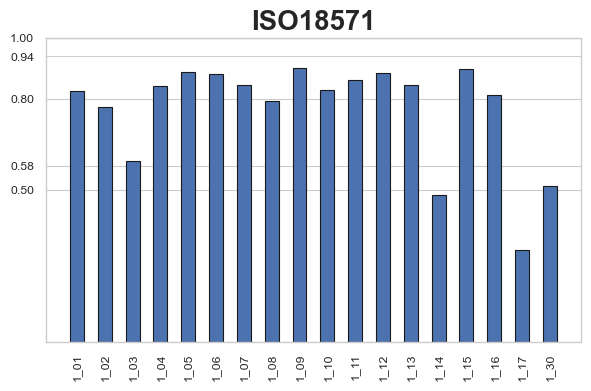

In [12]:
B1={'width' : 0.5 , 'color':'b','alpha':1, 'edgecolor':'k'}

fig, ax = plt.subplots(figsize=(6, 4))
br1 = np.arange(len(df_res))
ax.bar(br1,df_res['Overall Score'].values,**B1)

plt.xticks(range(len(df_res)), df_res['Test'], rotation=90)
ax.set_ylim([0,1])
ax.set_yticks([0.5,0.58,0.80,0.94,1])
ax.grid(axis='x')
ax.set_title('ISO18571',fontsize=20,fontweight='bold')
fig.tight_layout()
print('Average: {} \nRange: {}-{}'.format(df_res['Overall Score'].mean().round(2),
                                           min(df_res['Overall Score'].round(2)),
                                           max(df_res['Overall Score'].round(2))))

df_res.style.apply(select_col, axis=None).format(precision=2).set_caption("ISO 18571 results").set_table_styles(heading).set_properties(**content)

### 3-pt bending

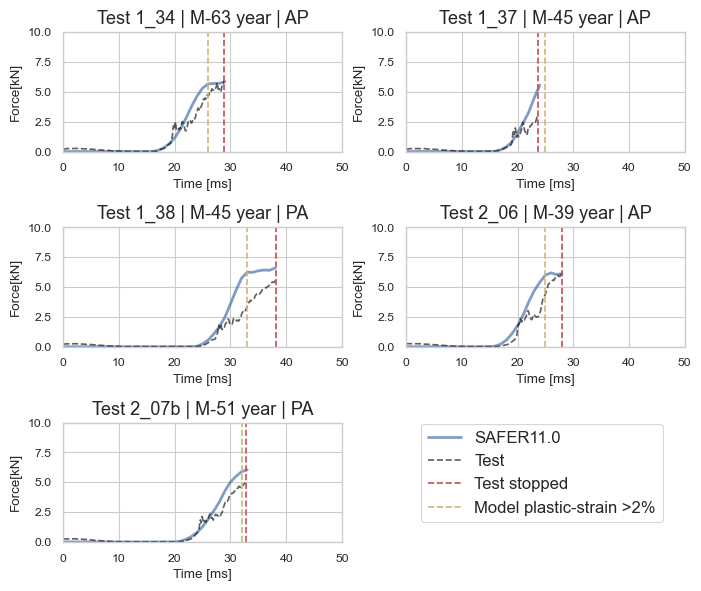

In [24]:
fig_ft, axs = plt.subplots(nrows=3, ncols=2,figsize=(7, 6))
i=18
start_time=[26,28,27,28,18,24,25,17,15,26,25,16,17,17,30,20,16,34,15,15.5,23,15,20]

for ax in axs.flat:
    ax.set_ylabel('Force[kN]')
    ax.set_xlabel('Time [ms]');
    if i > 22:
        break;
    ax.set_title('Test {} | M-{} year | {}'.format(Tests[i],Age[i],sp_pos[i]),fontsize=13)
    t=exp.Time[exp[Tests[i]]==max(exp[Tests[i]])].item()
    fail_2p=sim_output[Tests[i]].BONES.strain.time.iloc[sim_output[Tests[i]].BONES.strain.strain[sim_output[Tests[i]].BONES.strain.strain<0.0275].last_valid_index()][0]    
    ax.set_xlim([0,50])
    ax.set_ylim([0,10])
    ax.plot(sim_output[Tests[i]].impactor.Force.time.iloc[:round(t)+1],sim_output[Tests[i]].impactor.Force.force.iloc[:round(t)+1],**simulation)
    ax.plot(exp.Time,exp[Tests[i]],label='Test',**experiment)
    ax.axvline (x=t,linestyle='--',color='r')
    ax.axvline (x=fail_2p,linestyle='--',color='y')
    i=i+1
fig_ft.delaxes(axs[2,1])
fig_ft.legend(["SAFER11.0","Test","Test stopped","Model plastic-strain >2%"], bbox_to_anchor=(0.95,0.30),fontsize=12);
fig_ft.tight_layout()


### Energy plots

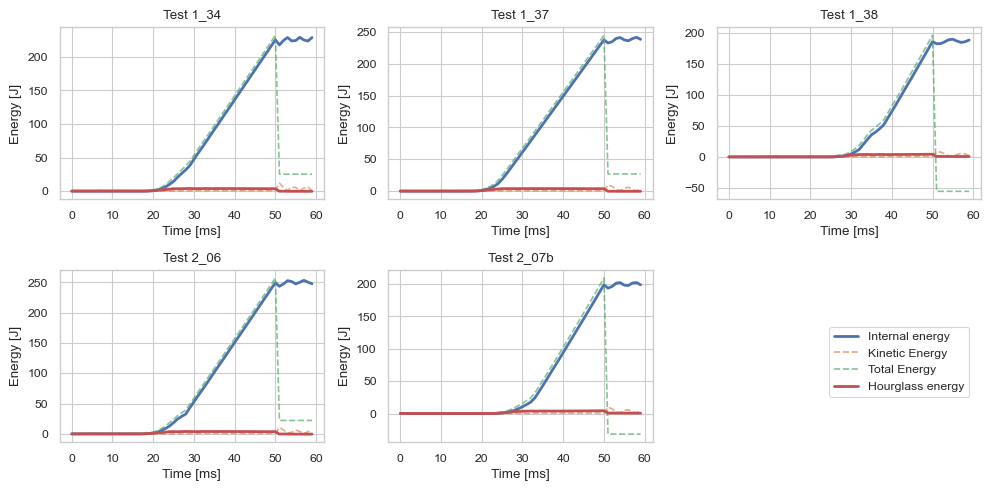

In [26]:
fig_eny, axs = plt.subplots(nrows=2, ncols=3,figsize=(10,5))
i=18
for ax in axs.flat:
    if i > 22:
        break;
    ax.plot(sim_output[Tests[i]].MODEL.Internal_Energy.time,sim_output[Tests[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Tests[i]].MODEL.Kinetic_Energy.time,sim_output[Tests[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Total_Energy.time,sim_output[Tests[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Hourglass_Energy.time,sim_output[Tests[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="Test {}".format(Tests[i]),xlabel='Time [ms]',ylabel='Energy [J]')
    i=i+1
fig_eny.delaxes(axs[1,2])

fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.98,0.35),ncol=1);
fig_eny.tight_layout()

#### ISO18571 objective rating for force-time histories

In [25]:
# Import objective rating metric library
from objective_rating_metrics.rating import ISO18571

In [27]:
## Resample data
def resam(xdata,ydata,sT,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(sT,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newx).flatten(),np.array(newy).flatten()    

df_res = pd.DataFrame(columns=['Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
i=18
for test in [ '1_34', '1_37','1_38', '2_06', '2_07b']:
    endT=0
    endT=sim_output[test].BONES.strain.time.iloc[sim_output[test].BONES.strain.strain[sim_output[test].BONES.strain.strain<0.0275].last_valid_index()][0]
    if endT>exp.Time[exp[Tests[i]]==max(exp[Tests[i]])].item():
        endT=exp.Time[exp[Tests[i]]==max(exp[Tests[i]])].item()
    df_rate = pd.DataFrame(columns=['Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
    if endT>start_time[i]:
        exp_v=exp[test].dropna()
        exp_t=exp.Time[:len(exp_v)].dropna()
        sim_t=np.array(sim_output[test].impactor.Force.time).flatten()
        sim_v=np.array(sim_output[test].impactor.Force.force).flatten()
        r_t,r_v=resam(exp_t,exp_v,start_time[i],endT)
        ref = np.vstack((r_t, r_v)).T
        s_t,s_v=resam(sim_t,sim_v,start_time[i],endT)
        sim = np.vstack((s_t, s_v)).T
        iso_rating = ISO18571(reference_curve=ref, comparison_curve=sim)
        df_rate['Test']=[test]
        df_rate['Corridor Score']=[iso_rating.corridor_rating()]
        df_rate['Phase Score']=[iso_rating.phase_rating()]
        df_rate['Magnitude Score']=[iso_rating.magnitude_rating()]
        df_rate['Slope Score']=[iso_rating.slope_rating()]
        df_rate['Overall Score']=[iso_rating.overall_rating()]
    df_res=pd.concat([df_res,df_rate], ignore_index=True)
    i=i+1


Average: 0.56 
Range: 0.26-0.78


,Test,Corridor Score,Phase Score,Magnitude Score,Slope Score,Overall Score
0,1_34,0.71,1,0.77,0.65,0.77
1,1_37,0.63,1,0.41,0.57,0.65
2,1_38,0.55,0,0.00,0.22,0.26
3,2_06,0.59,0.30,0.00,0.34,0.36
4,2_07b,0.71,1,0.79,0.68,0.78


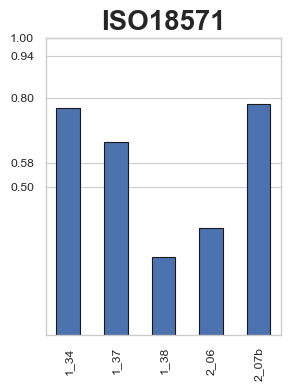

In [29]:
B1={'width' : 0.5 , 'color':'b','alpha':1, 'edgecolor':'k'}

fig, ax = plt.subplots(figsize=(3, 4))
br1 = np.arange(len(df_res))
ax.bar(br1,df_res['Overall Score'].values,**B1)

plt.xticks(range(len(df_res)), df_res['Test'], rotation=90)
ax.set_ylim([0,1])
ax.set_yticks([0.5,0.58,0.80,0.94,1])
ax.grid(axis='x')
ax.set_title('ISO18571',fontsize=20,fontweight='bold')
fig.tight_layout()
print('Average: {} \nRange: {}-{}'.format(df_res['Overall Score'].mean().round(2),
                                           min(df_res['Overall Score'].round(2)),
                                           max(df_res['Overall Score'].round(2))))

df_res.style.apply(select_col, axis=None).format(precision=2).set_caption("ISO 18571 results").set_table_styles(heading).set_properties(**content)